In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [39]:
b = pd.read_csv("/content/sample_data/csv_building_structure.csv")
df = pd.read_csv("/content/sample_data/ward_vdcmun_district_name_mapping.csv")

In [40]:
df=df[['district_id','district_name']]

In [41]:
# district_id'si ve district_name'i aynı olan satırları silme
df = df.drop_duplicates(subset=['district_id', 'district_name'], keep='first')

In [42]:
# damage_grade'i boş olan satırları silme
b = b.dropna(subset=['damage_grade'])

In [43]:
# Bina yapım yılı kolonu eklenmesi
today = datetime.date.today()

year = today.year

b['building_creation_year'] = 2015 - b['age_building']

In [44]:
# Floatları integer'a çevirme
for column in b.columns:
  if b[column].dtype == 'float64':
    b[column] = b[column].fillna(0).astype(int)

In [45]:
# Hasar seviyesini Stringden integer'a çevirme
def extract_grade_number(grade):
  if pd.isnull(grade):
    return np.nan
  else:
    return int(grade.split()[-1])

b['damage_grade'] = b['damage_grade'].apply(extract_grade_number)

In [46]:
# Tutarsız verileri silme

b = b.drop(b[(b['damage_grade'] == 5) & ((b['height_ft_pre_eq'] == b['height_ft_post_eq']) | (b['count_floors_pre_eq'] == b['count_floors_post_eq']))].index)
b = b.drop(b[(b['damage_grade'] == 4) & ((b['height_ft_pre_eq'] == b['height_ft_post_eq']) | (b['count_floors_pre_eq'] == b['count_floors_post_eq']))].index)
b = b.drop(b[(b['damage_grade'] == 1) & ((b['height_ft_pre_eq'] != b['height_ft_post_eq']) & (b['count_floors_pre_eq'] != b['count_floors_post_eq']))].index)
b = b.drop(b[(b['damage_grade'] == 3) & ((b['height_ft_pre_eq'] == 0) | (b['count_floors_pre_eq'] == 0))].index)
b = b.drop(b[(b['damage_grade'] != 5) & ((b['height_ft_pre_eq'] == 0) | (b['count_floors_pre_eq'] == 0))].index)
b = b[b['building_creation_year'] <= 2010]

# Teknik çözüme göre tutarsız verileri silme

b = b.drop(b[(b['damage_grade'] == 1) & ((b['height_ft_pre_eq'] > b['height_ft_post_eq']) | (b['count_floors_pre_eq'] > b['count_floors_post_eq']))].index)
b = b.drop(b[(b['damage_grade'] <= 2) & (b['technical_solution_proposed'] == 'Reconstruction')].index)
b = b.drop(b[(b['damage_grade'] <= 2) & (b['technical_solution_proposed'] == 'Major repair')].index)
b = b.drop(b[(b['damage_grade'] == 5) & (b['technical_solution_proposed'] != 'Reconstruction')].index)
b = b.drop(b[(b['damage_grade'] == 4) & (b['technical_solution_proposed'] == 'Minor repair')].index)
b = b.drop(b[(b['age_building'] > 50) & (b['damage_grade'] == 2)].index)
b = b.drop(b[(b['condition_post_eq'] == 'Damaged-Used in risk') & (b['damage_grade'] == 5)].index)

In [47]:
# b ve df verisetleri district_id'ye göre birleştirildi
merged_df = pd.merge(b, df[['district_id', 'district_name']], on='district_id', how='left')

In [48]:
# İlçelere göre hissedilen deprem büyüklükleri ve bu büyüklükleri birbirlerine göre katları eklendi

merged_df.loc[merged_df['district_name'] == 'Okhaldhunga', 'magnitude_felt'] = 1
merged_df.loc[merged_df['district_name'] == 'Okhaldhunga', 'magnitude'] = 5.5
merged_df.loc[merged_df['district_name'] == 'Sindhuli', 'magnitude_felt'] = 5
merged_df.loc[merged_df['district_name'] == 'Sindhuli', 'magnitude'] = 6.25
merged_df.loc[merged_df['district_name'] == 'Ramechhap', 'magnitude_felt'] = 20
merged_df.loc[merged_df['district_name'] == 'Ramechhap', 'magnitude'] = 6.75
merged_df.loc[merged_df['district_name'] == 'Dolakha', 'magnitude_felt'] = 80
merged_df.loc[merged_df['district_name'] == 'Dolakha', 'magnitude'] = 7.3
merged_df.loc[merged_df['district_name'] == 'Sindhupalchok', 'magnitude_felt'] = 40
merged_df.loc[merged_df['district_name'] == 'Sindhupalchok', 'magnitude'] = 7.0
merged_df.loc[merged_df['district_name'] == 'Kavrepalanchok', 'magnitude_felt'] = 18
merged_df.loc[merged_df['district_name'] == 'Kavrepalanchok', 'magnitude'] = 6.75
merged_df.loc[merged_df['district_name'] == 'Nuwakot', 'magnitude_felt'] = 30
merged_df.loc[merged_df['district_name'] == 'Nuwakot', 'magnitude'] = 6.9
merged_df.loc[merged_df['district_name'] == 'Rasuwa', 'magnitude_felt'] = 20
merged_df.loc[merged_df['district_name'] == 'Rasuwa', 'magnitude'] = 6.75
merged_df.loc[merged_df['district_name'] == 'Dhading', 'magnitude_felt'] = 40
merged_df.loc[merged_df['district_name'] == 'Dhading', 'magnitude'] = 7.0
merged_df.loc[merged_df['district_name'] == 'Makwanpur', 'magnitude_felt'] = 11
merged_df.loc[merged_df['district_name'] == 'Makwanpur', 'magnitude'] = 6.5
merged_df.loc[merged_df['district_name'] == 'Gorkha', 'magnitude_felt'] = 250
merged_df.loc[merged_df['district_name'] == 'Gorkha', 'magnitude'] = 7.8

In [49]:
b=merged_df

In [51]:
# Tutarsız veriler siliniyor

result_df_1 = b[(b['age_building'] > 70) & (b['count_floors_pre_eq'] >= 3) & (b['height_ft_post_eq'] != 0) & (b['damage_grade'] == 3)]
b = b.drop(result_df_1.index)
result_df_2 = b[(b['age_building'] > 100) & (b['count_floors_pre_eq'] >= 2) & (b['height_ft_post_eq'] != 0) & (b['damage_grade'] == 3)]
b = b.drop(result_df_2.index)
result_df_3 = b[(b['age_building'] > 70) & (b['magnitude'] >= 6) & (b['damage_grade'] == 1)]
b = b.drop(result_df_3.index)
result_df_4 = b[(b['age_building'] > 130)]
b = b.drop(result_df_4.index)
result_df_5 = b[(b['plinth_area_sq_ft'] > 700)]
b = b.drop(result_df_5.index)
result_df_6 = b[(b['height_ft_pre_eq'] >= 40)]
b = b.drop(result_df_6.index)

In [52]:
# Hasar seviyesi 2 ve 3 olanlar artık 2
# 4 ve 5 olanlar da 3 olacak
b.loc[b['damage_grade'].isin([2, 3]), 'damage_grade'] = 2
b.loc[b['damage_grade'].isin([4, 5]), 'damage_grade'] = 3

# b = pd.read_csv("/content/sample_data/data.csv")

In [53]:
# prompt: herhangi bir sütunu boş olan satırları silen kod (b için)

# Assuming 'b' is your DataFrame
b = b.dropna()

In [54]:
# prompt: damage_grade'i 3 olup'da count_floors_pre_eq'su count_floors_post_eq'su ile eşit olan satırları sil

# Assuming 'b' is your DataFrame and it's already loaded and preprocessed as in your original code.

b = b[~((b['damage_grade'] == 1) & (b['count_floors_pre_eq'] != b['count_floors_pre_eq']))]
b = b[~((b['damage_grade'] == 2) & (b['count_floors_pre_eq'] == b['count_floors_post_eq']))]
b = b[~((b['damage_grade'] == 3) & (b['count_floors_post_eq'] != 0))]

b = b[~((b['damage_grade'] == 1) & (b['height_ft_pre_eq'] != b['height_ft_pre_eq']))]
b = b[~((b['damage_grade'] == 2) & (b['height_ft_pre_eq'] == b['height_ft_post_eq']))]
b = b[~((b['damage_grade'] == 3) & (b['height_ft_post_eq'] != 0))]

In [61]:
b['technical_solution_proposed'].unique()

b['technical_solution_proposed'] = b['technical_solution_proposed'].replace(['Major repair', 'Minor repair'], 'Repair')

In [63]:
b = b[~((b['damage_grade'] == 2) & (b['technical_solution_proposed'] == 'No Need'))]
b = b[~((b['damage_grade'] == 2) & (b['technical_solution_proposed'] == 'Reconstruction'))]
b = b[~((b['damage_grade'] == 1) & (b['technical_solution_proposed'] == 'Reconstruction'))]
b = b[~((b['damage_grade'] == 3) & (b['technical_solution_proposed'] != 'Reconstruction'))]

In [64]:
pd.set_option('display.max_columns', 500)
b

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,building_creation_year,district_name,magnitude_felt,magnitude
3,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,Repair,1985,Okhaldhunga,1.0,5.5
5,120101000071,12,1207,120703,1,0,13,234,9,0,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,3,Reconstruction,2002,Okhaldhunga,1.0,5.5
9,120101000121,12,1207,120703,2,2,15,528,21,21,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Not damaged,1,Repair,2000,Okhaldhunga,1.0,5.5
10,120101000131,12,1207,120703,2,2,18,528,21,21,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,No need,1997,Okhaldhunga,1.0,5.5
12,120101000161,12,1207,120703,2,2,7,330,19,19,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,No need,2008,Okhaldhunga,1.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513802,366709001231,36,3603,360302,2,2,13,513,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Not damaged,1,Repair,2002,Gorkha,250.0,7.8
513803,366709001241,36,3603,360302,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,3,Reconstruction,1955,Gorkha,250.0,7.8
513804,366709001251,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,3,Reconstruction,1980,Gorkha,250.0,7.8
513805,366709001261,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,3,Reconstruction,1980,Gorkha,250.0,7.8


<ipython-input-66-cd63512d8ed8>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-66-cd63512d8ed8>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-66-cd63512d8ed8>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

XGBoost Accuracy: 0.932
Random Forest Accuracy: 0.93


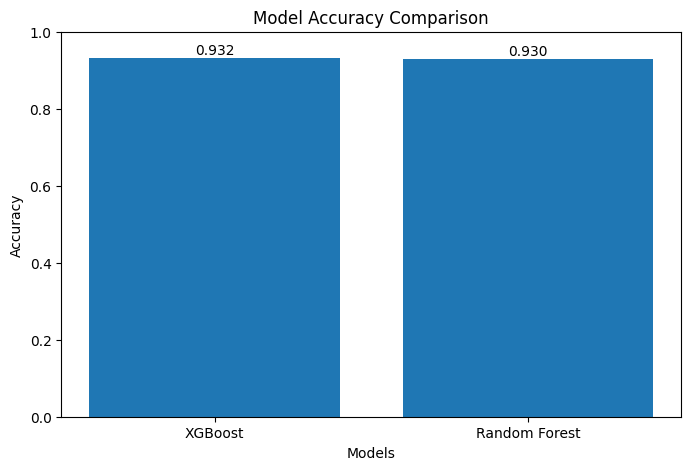

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
# ... (Your existing code) ...

# Assuming your DataFrame is named 'b' and the code you provided has been executed
data = b

# Select features and target variable
features = [
    "plinth_area_sq_ft",
    "magnitude_felt",
    "magnitude",
    "land_surface_condition",
    "count_floors_pre_eq",
    "height_ft_pre_eq",
    "roof_type",
    "age_building",
    "foundation_type",
    "ground_floor_type",
    "other_floor_type",
    "has_superstructure_adobe_mud",
    "has_superstructure_stone_flag",
    "has_superstructure_cement_mortar_stone",
    "has_superstructure_mud_mortar_brick",
    "has_superstructure_cement_mortar_brick",
    "has_superstructure_timber",
    "has_superstructure_bamboo",
    "has_superstructure_rc_non_engineered",
    "has_superstructure_rc_engineered",
    "has_superstructure_other",
]

target = "damage_grade"

X = data[features]
y = data[target] - 1

# Convert categorical features to numerical using Label Encoding
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store feature weights
feature_weights = {
    "magnitude_felt": 5,
    "magnitude": 5,
    "roof_type": 2,
    "age_building":5,
    "ground_floor_type": 2,
    "other_floor_type": 2,
    "foundation_type":4,
    "has_superstructure_cement_mortar_stone":2,
    "has_superstructure_mud_mortar_brick":2,
    "has_superstructure_cement_mortar_brick":2,
}

# Assign weights to features in X_train and X_test
for feature, weight in feature_weights.items():
    if feature in X_train.columns:
        X_train[feature] = X_train[feature] * weight
    if feature in X_test.columns:
        X_test[feature] = X_test[feature] * weight


# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", round(xgb_accuracy, 3))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", round(rf_accuracy, 3))

import matplotlib.pyplot as plt

# Doğruluk değerlerini listeye ekle
model_names = ['XGBoost', 'Random Forest']
accuracies = [xgb_accuracy, rf_accuracy]

# Grafik oluştur
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Doğruluk oranları 0-1 arasında olduğundan eksen sınırlarını ayarlayın
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(model_names)
plt.bar_label(plt.bar(model_names, accuracies), fmt='%.3f')  # Doğrulukları sütun üzerinde göster
plt.show()

<ipython-input-67-54578fed0a53>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-67-54578fed0a53>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-67-54578fed0a53>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

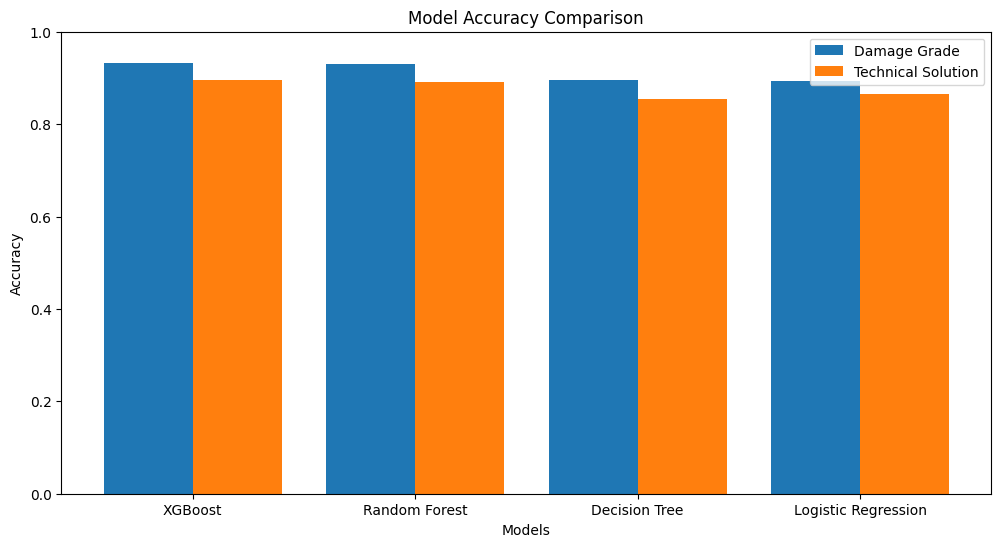

In [67]:
# prompt: bir üstteki xgboost ve random forest için damage_grade yapan koda technical_solution_proposed kolonunu da tahmin edecek şekilde ve decision tree ve logistic regression modellerini da ekleyerek bu 2 kolonun 4 model üzerindeki accuracy değerlerini tek grafikte gösterir misin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code for data loading and preprocessing) ...

# Assuming your DataFrame is named 'data' and the code you provided has been executed
# Select features and target variables
features = [
    "plinth_area_sq_ft",
    "magnitude_felt",
    "magnitude",
    "land_surface_condition",
    "count_floors_pre_eq",
    "height_ft_pre_eq",
    "roof_type",
    "age_building",
    "foundation_type",
    "ground_floor_type",
    "other_floor_type",
    "has_superstructure_adobe_mud",
    "has_superstructure_stone_flag",
    "has_superstructure_cement_mortar_stone",
    "has_superstructure_mud_mortar_brick",
    "has_superstructure_cement_mortar_brick",
    "has_superstructure_timber",
    "has_superstructure_bamboo",
    "has_superstructure_rc_non_engineered",
    "has_superstructure_rc_engineered",
    "has_superstructure_other",
]

target_damage = "damage_grade"
target_solution = "technical_solution_proposed"

X = data[features]
y_damage = data[target_damage] - 1
y_solution = data[target_solution]

# Convert categorical features to numerical using Label Encoding
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
le_solution = LabelEncoder()
y_solution = le_solution.fit_transform(y_solution)


# Split data into training and testing sets
X_train, X_test, y_damage_train, y_damage_test, y_solution_train, y_solution_test = train_test_split(
    X, y_damage, y_solution, test_size=0.2, random_state=42
)

# Feature weights
feature_weights = {
    "magnitude_felt": 5, "magnitude": 5, "roof_type": 2, "age_building": 5,
    "ground_floor_type": 2, "other_floor_type": 2, "foundation_type": 4,
    "has_superstructure_cement_mortar_stone": 2,
    "has_superstructure_mud_mortar_brick": 2,
    "has_superstructure_cement_mortar_brick": 2
}


for feature, weight in feature_weights.items():
    if feature in X_train.columns:
        X_train[feature] = X_train[feature] * weight
    if feature in X_test.columns:
        X_test[feature] = X_test[feature] * weight


models = {
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

accuracies_damage = {}
accuracies_solution = {}

for model_name, model in models.items():
    # Train and predict for damage_grade
    model.fit(X_train, y_damage_train)
    y_damage_pred = model.predict(X_test)
    accuracies_damage[model_name] = accuracy_score(y_damage_test, y_damage_pred)

    # Train and predict for technical_solution_proposed
    model.fit(X_train, y_solution_train)  # Train again for the solution target
    y_solution_pred = model.predict(X_test)
    accuracies_solution[model_name] = accuracy_score(y_solution_test, y_solution_pred)


model_names = list(models.keys())
damage_accuracies = list(accuracies_damage.values())
solution_accuracies = list(accuracies_solution.values())

X_axis = np.arange(len(model_names))
plt.figure(figsize=(12, 6))
plt.bar(X_axis - 0.2, damage_accuracies, 0.4, label='Damage Grade')
plt.bar(X_axis + 0.2, solution_accuracies, 0.4, label='Technical Solution')
plt.xticks(X_axis, model_names)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.ylim(0,1)
plt.show()